In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from data import gather_data

In [4]:
def load_data():
    df = gather_data()

    df['model_name'] = df['model_name'].str.split('pysb.examples.').str.get(-1)
    df = df.loc[~df.model_name.isin(['ras_camp_pka'])]
    df = df.loc[(df.n_sim < 2 ** 17) & (df.n_sim > 2 ** 7)]
    
    # rename gpus
    df.loc[df['gpu_name'] == 'gtx1080', 'gpu_name'] = 'GTX1080'
    df.loc[df['gpu_name'] == 'GeForce GTX 1060', 'gpu_name'] = 'GTX1060'
    df.loc[df['gpu_name'] == 'GeForce GTX 1080', 'gpu_name'] = 'GTX1080'

    df.loc[df['gpu_name'] == 'TeslaV100-SXM2-16GB', 'gpu_name'] = 'TeslaV100'
    df.loc[df['gpu_name'] == 'VOLTA_V100', 'gpu_name'] = 'TeslaV100'
    df.loc[df['gpu_name'] == 'Tesla K20c', 'gpu_name'] = 'K20c'

    # rename pcs
    df.loc[df['device_name'] == 'bad.mc.vanderbilt.edu', 'device_name'] = 'bad'
    df.loc[df['device_name'] == 'ip-172-31-22-73', 'device_name'] = 'aws'

    # rename simulators
    df.loc[df['simulator'] == 'gpu_ssa', 'simulator'] = 'cuda'
    df.loc[df['simulator'] == 'cl_amd_gpu', 'simulator'] = 'opencl'
    df.loc[df['simulator'] == 'cl_amd', 'simulator'] = 'opencl'
    df.loc[df['simulator'] == 'cl_nvidia', 'simulator'] = 'opencl'
    df.loc[df['simulator'] == 'cl', 'simulator'] = 'opencl'


    crit = (df.simulator == 'stochkit') & (df.n_cpu == 64)
    df.loc[crit, 'simulator'] = 'stochkit_64'


    df.loc[(df['gpu_name'] == 'i5_6500T') & (df['simulator'] == 'cl_intel_gpu'), 'gpu_name'] = 'HD530'
    
    df['sim_card'] = df['gpu_name'] + '_' + df['simulator']
    df.sim_time = df.sim_time.astype('float')
    return df

def print_opts(d):
    print('\npc name : {}'.format(' '.join(sorted(d['device_name'].unique()))))
    print('model_name : {}'.format(' '.join(sorted(d['model_name'].unique()))))
    print('simulator : {}'.format(' '.join(sorted(d['simulator'].unique()))))
    print('gpu_name : {}'.format(' '.join(sorted(d['gpu_name'].unique()))))
    print('sim_card : {}'.format(' '.join(sorted(d['sim_card'].unique()))))

In [5]:
df = load_data()
print_opts(df)
gpu_only = ['cuda', 'opencl']
gpu_only = df.loc[df.simulator.isin(gpu_only)].copy()
print_opts(gpu_only)


pc name : aws bad buu diablo mule pct piccolo picollo puma
model_name : earm_1_0 kinase_cascade michment schloegl schlogl
simulator : bng cl_amd_cpu cl_intel cl_intel_cpu cl_intel_gpu cuda opencl stochkit stochkit_64
gpu_name : GTX1060 GTX1080 GTX980Ti HD530 HD7970 RTX2080 Ryzen_3900x TeslaK20c TeslaV100 i5_6500T
sim_card : GTX1060_bng GTX1060_cuda GTX1080_cuda GTX1080_opencl GTX980Ti_cuda GTX980Ti_opencl HD530_cl_intel_gpu HD7970_opencl RTX2080_bng RTX2080_cuda RTX2080_opencl RTX2080_stochkit Ryzen_3900x_cl_amd_cpu TeslaK20c_cuda TeslaK20c_opencl TeslaV100_bng TeslaV100_cuda TeslaV100_opencl TeslaV100_stochkit TeslaV100_stochkit_64 i5_6500T_cl_intel i5_6500T_cl_intel_cpu

pc name : aws bad buu diablo mule piccolo picollo puma
model_name : earm_1_0 kinase_cascade michment schloegl schlogl
simulator : cuda opencl
gpu_name : GTX1060 GTX1080 GTX980Ti HD7970 RTX2080 TeslaK20c TeslaV100
sim_card : GTX1060_cuda GTX1080_cuda GTX1080_opencl GTX980Ti_cuda GTX980Ti_opencl HD7970_opencl RTX2080_

In [6]:
main_pcs = ['aws', 'bad']
tesla_results = df.loc[df.device_name.isin(main_pcs)].copy()

In [7]:
print_opts(tesla_results)


pc name : aws bad
model_name : earm_1_0 kinase_cascade michment schlogl
simulator : bng cuda opencl stochkit stochkit_64
gpu_name : TeslaV100
sim_card : TeslaV100_bng TeslaV100_cuda TeslaV100_opencl TeslaV100_stochkit TeslaV100_stochkit_64


In [8]:
tesla_results.loc[tesla_results.model_name.isin(['earm_1_0',])]

,device_name,end_time,gpu_name,model_name,n_sim,n_ts,sim_time,simulator,total_time,n_cpu,sim_card
1,bad,20000,TeslaV100,earm_1_0,256,101,6348.137200,bng,6356.825094,1,TeslaV100_bng
2,bad,20000,TeslaV100,earm_1_0,512,101,12628.227800,bng,12645.359526,1,TeslaV100_bng
3,bad,20000,TeslaV100,earm_1_0,1024,101,25805.277000,bng,25839.436697,1,TeslaV100_bng
4,bad,20000,TeslaV100,earm_1_0,2048,101,53670.920300,bng,53742.258672,1,TeslaV100_bng
5,bad,20000,TeslaV100,earm_1_0,4096,101,113075.984700,bng,113218.913081,1,TeslaV100_bng
6,bad,20000,TeslaV100,earm_1_0,8192,101,203555.371500,bng,203817.357286,1,TeslaV100_bng
7,bad,20000,TeslaV100,earm_1_0,16384,101,404603.918500,bng,405138.645481,1,TeslaV100_bng
8,bad,20000,TeslaV100,earm_1_0,32768,101,827438.203000,bng,828541.440838,1,TeslaV100_bng
1,bad,20000,TeslaV100,earm_1_0,256,101,216.748763,cuda,216.950264,1,TeslaV100_cuda
2,bad,20000,TeslaV100,earm_1_0,512,101,205.838771,cuda,206.103830,1,TeslaV100_cuda


In [9]:
tesla_results.dtypes

device_name     object
end_time         int64
gpu_name        object
model_name      object
n_sim            int64
n_ts             int64
sim_time       float64
simulator       object
total_time     float64
n_cpu            int64
sim_card        object
dtype: object

In [10]:
tesla_results.head(10)

,device_name,end_time,gpu_name,model_name,n_sim,n_ts,sim_time,simulator,total_time,n_cpu,sim_card
1,bad,20000,TeslaV100,earm_1_0,256,101,6348.1372,bng,6356.825094,1,TeslaV100_bng
2,bad,20000,TeslaV100,earm_1_0,512,101,12628.2278,bng,12645.359526,1,TeslaV100_bng
3,bad,20000,TeslaV100,earm_1_0,1024,101,25805.2770,bng,25839.436697,1,TeslaV100_bng
4,bad,20000,TeslaV100,earm_1_0,2048,101,53670.9203,bng,53742.258672,1,TeslaV100_bng
5,bad,20000,TeslaV100,earm_1_0,4096,101,113075.9847,bng,113218.913081,1,TeslaV100_bng
6,bad,20000,TeslaV100,earm_1_0,8192,101,203555.3715,bng,203817.357286,1,TeslaV100_bng
7,bad,20000,TeslaV100,earm_1_0,16384,101,404603.9185,bng,405138.645481,1,TeslaV100_bng
8,bad,20000,TeslaV100,earm_1_0,32768,101,827438.2030,bng,828541.440838,1,TeslaV100_bng
1,bad,100,TeslaV100,kinase_cascade,256,101,1051.3700,bng,1056.029964,1,TeslaV100_bng
2,bad,100,TeslaV100,kinase_cascade,512,101,2102.8100,bng,2111.618109,1,TeslaV100_bng


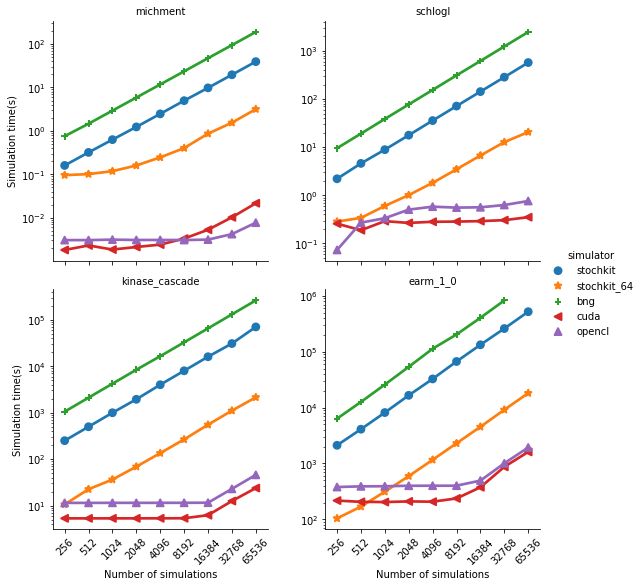

In [11]:
def compare_times(data, save_name="time_compare"):
    g = sns.catplot(
        x="n_sim", y="sim_time", hue="simulator", 
        col="model_name", kind="point", data=data, 
        sharey=False, col_wrap=2, height=4, 
        col_order = ['michment', 'schlogl', 'kinase_cascade', 'earm_1_0'],
        hue_order = ['stochkit', 'stochkit_64', 'bng', 'cuda', 'opencl'],
        markers=['o', '*', '+', '<', '^']
    )
    g.set_titles("{col_name}")
    g.set_axis_labels("Number of simulations", "Simulation time(s)")
    g.set(yscale="log")    
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    g.set_xticklabels(labels, rotation=45)
    plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight')
    plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight')
    
compare_times(tesla_results)

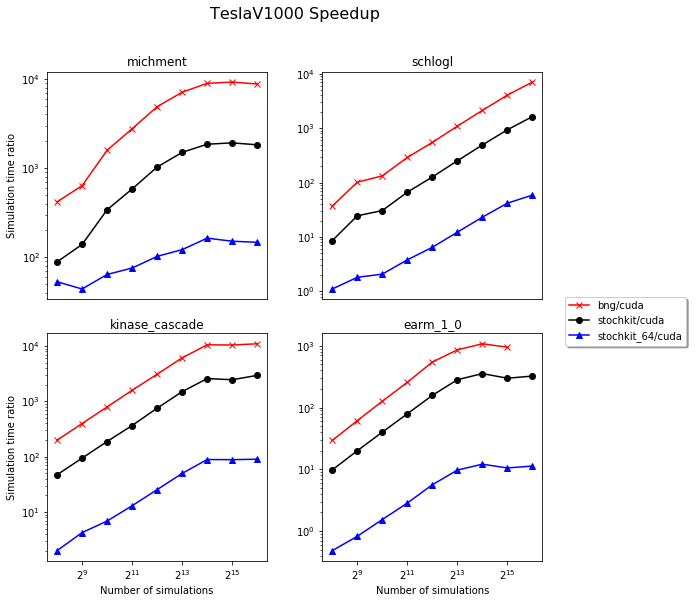

In [12]:
def plot_ratio(data, save_name="bng_gpu_ratio"):
    """
    Plots the ratio of BNG run times to GPU_SSA run times
    """

    d = pd.pivot_table(
        data[['model_name', 'n_sim', 'simulator', 'sim_time']],
        index=['model_name', 'n_sim'],
        columns='simulator',
        values='sim_time'
    )
    
    def f2(x):
        return '{0:.3f}'.format(x)
    d.to_latex('sum_table_latex.tex', 
               formatters={'bng': f2, 'cuda':f2, 'opencl':f2, 'stochkit':f2, 'stochkit_64':f2},
               bold_rows=True)
    d['ratio_bng'] = d['bng'] / d['cuda']
    d['ratio_stochkit'] = d['stochkit'] / d['cuda']
    d['ratio_stochkit_64'] = d['stochkit_64'] / d['cuda']
#     print(d[['ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64']])
    d.reset_index(inplace=True)
    d.to_csv('all_times.csv')
    
    count = 1
    fig = plt.figure(figsize=(8, 9))
    for i in ['michment', 'schlogl', 'kinase_cascade', 'earm_1_0']:
        
        ax = plt.subplot(2,2, count)
        plt.title(i)
        df = d.loc[d.model_name==i][['n_sim', 'ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64']]
        l1,= plt.plot(df['n_sim'], df['ratio_bng'], 'x-r', label='ratio_bng')
        l2,= plt.plot(df['n_sim'], df['ratio_stochkit'], 'o-k', label='ratio_stochkit')
        l3,= plt.plot(df['n_sim'], df['ratio_stochkit_64'], '^-b', label='ratio_stochkit_64')
        ax.set_xscale('log', basex=2)    
        ax.set_yscale('log', basey=10) 
        plt.ylabel("Simulation time ratio")
        plt.xlabel("Number of simulations")
        if count in (1,2):
            plt.xlabel('')
            plt.xticks([])
        if count in (2, 4):
            plt.ylabel('')
        count+=1
    lgd = fig.legend(
        [l1, l2, l3],
        ["bng/cuda", "stochkit/cuda", "stochkit_64/cuda"],
        fancybox=True, shadow=True, 
        bbox_to_anchor=(1.2, .48),
    )
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.15)
    plt.suptitle('TeslaV1000 Speedup', size=16)
    plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight', bbox_extra_artists=(lgd,),)
    plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight', bbox_extra_artists=(lgd,),)
plot_ratio(tesla_results)

['GTX1080' 'GTX980Ti' 'HD7970' 'RTX2080' 'TeslaK20c' 'TeslaV100']
['GTX1080' 'GTX980Ti' 'HD7970' 'RTX2080' 'TeslaK20c' 'TeslaV100']
['GTX1080' 'GTX980Ti' 'HD7970' 'RTX2080' 'TeslaK20c' 'TeslaV100']
['GTX1080' 'GTX980Ti' 'RTX2080' 'TeslaK20c' 'TeslaV100']


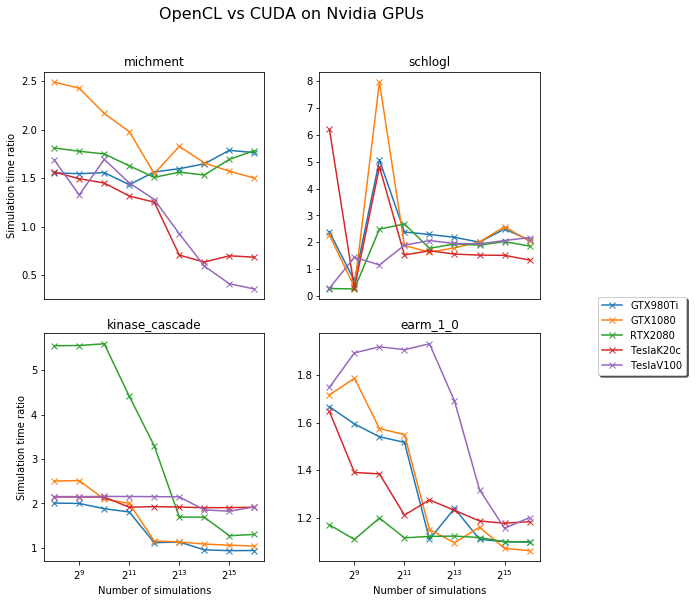

In [13]:
def plot_ratio_cuda_opencl(data, save_name="opencl_cl_ratio"):
    """
    Plots the ratio of BNG run times to GPU_SSA run times
    """
    df_gpu = data.loc[~data.gpu_name.isin(['GTX1060'])].copy()
    d = pd.pivot_table(
        df_gpu[['model_name', 'n_sim', 'simulator', 'sim_time', 'gpu_name']],
        index=['model_name',  'gpu_name', 'n_sim',],
        columns='simulator',
        values='sim_time'
    )
    
    
    def f2(x):
        return '{0:.3f}'.format(x)
    d.to_latex('sum_table_latex.tex', 
               formatters={'bng': f2, 'cuda':f2, 'opencl':f2, 'stochkit':f2, 'stochkit_64':f2},
               bold_rows=True)
    d['ratio'] = d['opencl'] / d['cuda']
#     print(d[['ratio_bng', 'ratio_stochkit', 'ratio_stochkit_64']])
    d.reset_index(inplace=True)
#     d.to_csv('all_times.csv')
    
    count = 1
    fig = plt.figure(figsize=(8, 9))
    for i in ['michment', 'schlogl', 'kinase_cascade', 'earm_1_0']:
        
        ax = plt.subplot(2,2, count)
        plt.title(i)
        df = d.loc[d.model_name==i][['n_sim', 'ratio', 'gpu_name']]
        print(df.gpu_name.unique())
        gpus = [ 'GTX980Ti', 'GTX1080', 'RTX2080', 'TeslaK20c', 'TeslaV100']
        legends = []
        labels = []
        for i in gpus:
            dd = df.loc[df.gpu_name==i].copy()
            dd.sort_values('n_sim', inplace=True)
            l1,= plt.plot(dd['n_sim'], dd['ratio'], 'x-', label=i)
            
            legends.append(l1)
            labels.append(i)
        ax.set_xscale('log', basex=2)    
#         ax.set_yscale('log', basey=10) 
        plt.ylabel("Simulation time ratio")
        plt.xlabel("Number of simulations")
        
        if count in (1,2):
            plt.xlabel('')
            plt.xticks([])
        if count in (2, 4):
            plt.ylabel('')
        count+=1
        lgd = fig.legend(
            legends, labels,
            fancybox=True, shadow=True, 
            bbox_to_anchor=(1.2, .48),
        )
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.15)
    plt.suptitle('OpenCL vs CUDA on Nvidia GPUs', size=16)
    plt.savefig('{}.png'.format(save_name), dpi=300, bbox_inches='tight')# bbox_extra_artists=(lgd,),)
    plt.savefig('{}.pdf'.format(save_name), dpi=300, bbox_inches='tight')#bbox_extra_artists=(lgd,),)
plot_ratio_cuda_opencl(gpu_only)

['bng' 'cuda' 'opencl' 'stochkit' 'cl_intel' 'cl_intel_cpu' 'cl_intel_gpu'
 'stochkit_64' 'cl_amd_cpu']
['GTX1080_cuda' 'GTX1080_opencl' 'GTX980Ti_cuda' 'GTX980Ti_opencl'
 'HD7970_opencl' 'RTX2080_cuda' 'RTX2080_opencl' 'Ryzen_3900x_cl_amd_cpu'
 'TeslaK20c_cuda' 'TeslaK20c_opencl' 'TeslaV100_cuda' 'TeslaV100_opencl']
['GTX1080_cuda' 'GTX1080_opencl' 'GTX980Ti_cuda' 'GTX980Ti_opencl'
 'HD7970_opencl' 'RTX2080_cuda' 'RTX2080_opencl' 'Ryzen_3900x_cl_amd_cpu'
 'TeslaK20c_cuda' 'TeslaK20c_opencl' 'TeslaV100_cuda' 'TeslaV100_opencl']
['GTX1080_cuda' 'GTX1080_opencl' 'GTX980Ti_cuda' 'GTX980Ti_opencl'
 'HD7970_opencl' 'RTX2080_cuda' 'RTX2080_opencl' 'Ryzen_3900x_cl_amd_cpu'
 'TeslaK20c_cuda' 'TeslaK20c_opencl' 'TeslaV100_cuda' 'TeslaV100_opencl']
['GTX1080_cuda' 'GTX1080_opencl' 'GTX980Ti_cuda' 'GTX980Ti_opencl'
 'RTX2080_cuda' 'RTX2080_opencl' 'Ryzen_3900x_cl_amd_cpu' 'TeslaK20c_cuda'
 'TeslaK20c_opencl' 'TeslaV100_cuda' 'TeslaV100_opencl']


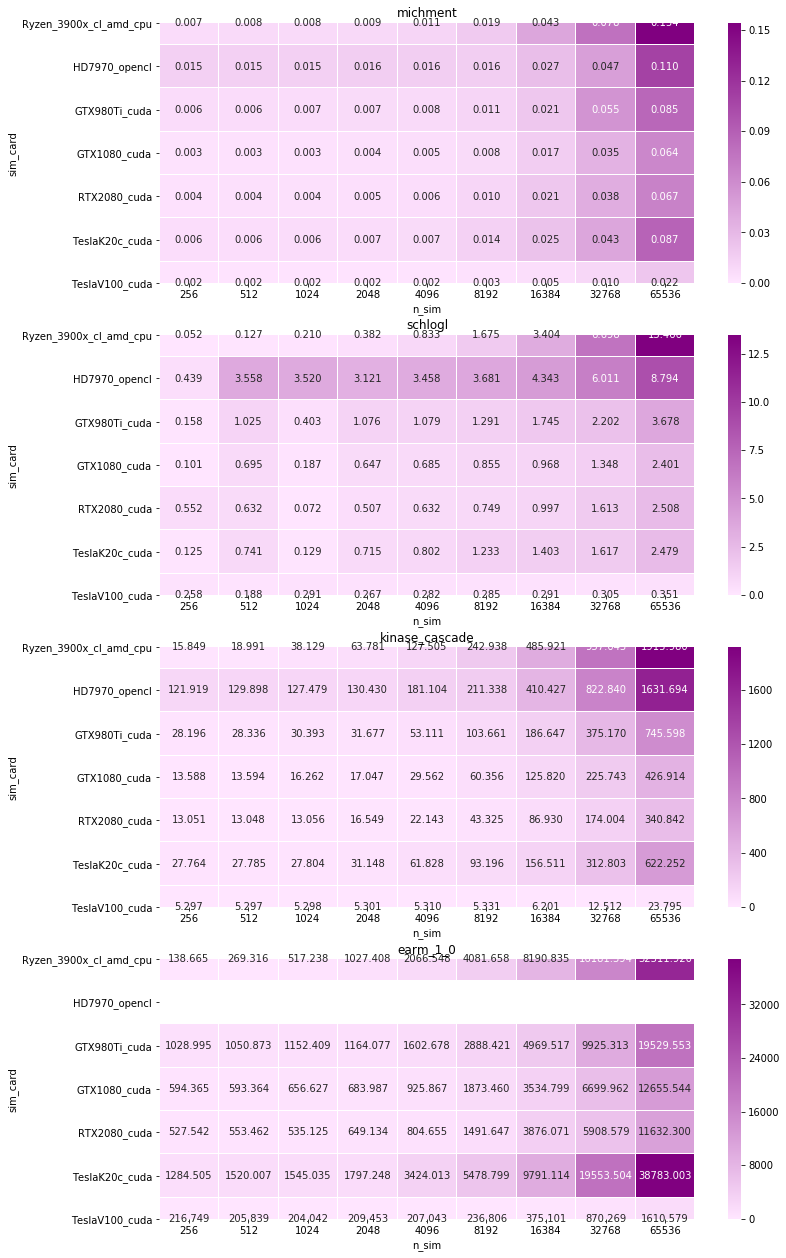

In [20]:
def compare_gpus():
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = df.copy()
    print(df.simulator.unique())
    gpus = [
        'cuda', 
        'opencl', 
        'cl_amd_cpu',
        #'cl_intel_gpu', 'cl_amd', 'cl_nvidia'
    ]
    
    df_gpu =local_df.loc[local_df.simulator.isin(gpus)].copy()
#     df_gpu = gpu_only.copy()
    models = [
        'michment',
        'schlogl',
        'kinase_cascade',
        'earm_1_0',
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()
    df_gpu = df_gpu.loc[~df_gpu.gpu_name.isin(['GTX1060'])]

    fig = plt.figure(figsize=(12, 22))

    for n, m in enumerate(models):
        subset = df_gpu.loc[df_gpu['model_name'] == m].copy()

        d = pd.pivot_table(
            subset, index='sim_card', columns='n_sim', values='sim_time',
            fill_value=np.nan,
        )
        print(d.index.values)
        keep = [
            'Ryzen_3900x_cl_amd_cpu',
            'HD7970_opencl',
#             'GTX980Ti_opencl', 
            'GTX980Ti_cuda',
#             'GTX1080_opencl', 
            'GTX1080_cuda', 
#             'RTX2080_opencl',
            'RTX2080_cuda' ,
#             'TeslaK20c_opencl', 
            'TeslaK20c_cuda',
#             'TeslaV100_opencl', 
            'TeslaV100_cuda',
        ]
        d = d.reindex(keep)
        ax = fig.add_subplot(4, 1, n + 1)
        ax.set_title(m)
        sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                    fmt=".3f", ax=ax)

#     plt.tight_layout()
    plt.savefig("compare_gpus.png", bbox_inches='tight', dpi=300)
    plt.show()


compare_gpus()

['bng' 'cuda' 'opencl' 'stochkit' 'cl_intel' 'cl_intel_cpu' 'cl_intel_gpu'
 'stochkit_64' 'cl_amd_cpu']
   device_name  end_time   gpu_name model_name  n_sim  n_ts     sim_time  \
1          bad       100  TeslaV100   michment    256   101     0.755400   
2          bad       100  TeslaV100   michment    512   101     1.462000   
3          bad       100  TeslaV100   michment   1024   101     2.926800   
4          bad       100  TeslaV100   michment   2048   101     5.858100   
5          bad       100  TeslaV100   michment   4096   101    11.741400   
..         ...       ...        ...        ...    ...   ...          ...   
5         mule       100    RTX2080   michment   4096   101    68.317216   
6         mule       100    RTX2080   michment   8192   101   152.146590   
7         mule       100    RTX2080   michment  16384   101   344.476739   
8         mule       100    RTX2080   michment  32768   101   818.983960   
9         mule       100    RTX2080   michment  65536   101 

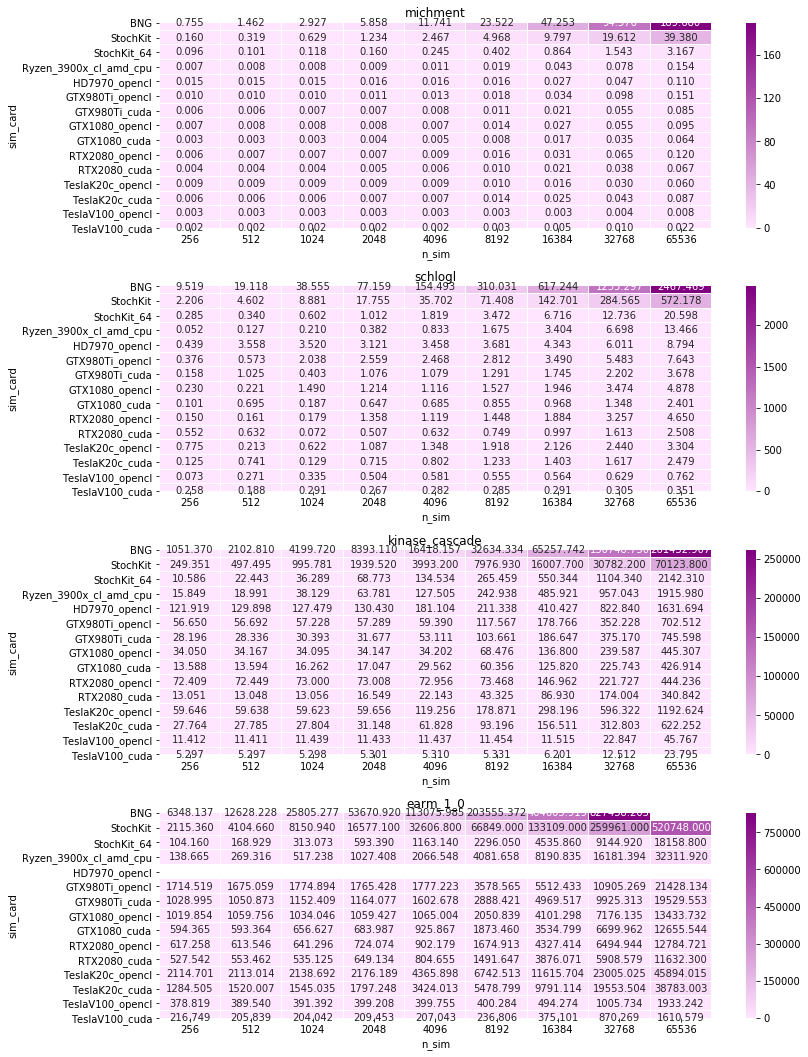

In [15]:
def timing_summary():
    pal = sns.light_palette("purple", as_cmap=True)
    local_df = df.copy()
    print(df.simulator.unique())
    gpus = [
        'cuda', 
        'opencl', 
        'cl_amd_cpu',
        'bng', 
        'stochkit', 
        'stochkit_64',
        
    ]
    
    df_gpu =local_df.loc[local_df.simulator.isin(gpus)].copy()
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit', 'sim_card']= 'StochKit'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_stochkit_64', 'sim_card']= 'StochKit_64'
    df_gpu.loc[df_gpu.sim_card=='TeslaV100_bng', 'sim_card']= 'BNG'
    models = [
        'michment',
        'schlogl',
        'kinase_cascade',
        'earm_1_0',
    ]
    df_gpu = df_gpu.loc[df_gpu.model_name.isin(models)].copy()
    df_gpu = df_gpu.loc[~df_gpu.gpu_name.isin(['GTX1060'])]

    fig = plt.figure(figsize=(12, 18))

    for n, m in enumerate(models):
        subset = df_gpu.loc[df_gpu['model_name'] == m].copy()
        print(subset)
       
        d = pd.pivot_table(
            subset, index='sim_card', columns='n_sim', values='sim_time',
            fill_value=np.nan,
        )
        print(d.index.values)
        keep = [
            'BNG', 'StochKit', 'StochKit_64',
            'Ryzen_3900x_cl_amd_cpu',
            'HD7970_opencl',
            'GTX980Ti_opencl', 'GTX980Ti_cuda',
            'GTX1080_opencl', 'GTX1080_cuda', 
            'RTX2080_opencl','RTX2080_cuda' ,
            'TeslaK20c_opencl', 'TeslaK20c_cuda',
            'TeslaV100_opencl', 'TeslaV100_cuda',
        ]
        d = d.reindex(keep)
        ax = fig.add_subplot(5, 1, n + 1)
        ax.set_title(m)
        sns.heatmap(data=d, cmap=pal, linewidths=0.01, vmin=0, annot=True,
                    fmt=".3f", ax=ax)

    plt.tight_layout()
    plt.savefig("compare_gpus.png", bbox_inches='tight', dpi=300)
    plt.show()


timing_summary()

In [29]:
times = pd.read_csv('Timings/times.csv')
times.head(10)

,device_name,end_time,gpu_name,model_name,n_sim,n_ts,sim_time,simulator,total_time
0,buu,100,RTX2080,pysb.examples.michment,128,101,0.018014,gpu_ssa,1.389110
1,buu,100,RTX2080,pysb.examples.michment,256,101,0.011009,gpu_ssa,1.380150
2,buu,100,RTX2080,pysb.examples.michment,512,101,0.012010,gpu_ssa,1.411325
3,buu,100,RTX2080,pysb.examples.michment,1024,101,0.015023,gpu_ssa,1.471651
4,buu,100,RTX2080,pysb.examples.michment,2048,101,0.021017,gpu_ssa,1.499957
5,buu,100,RTX2080,pysb.examples.michment,4096,101,0.034029,gpu_ssa,1.718466
6,buu,100,RTX2080,pysb.examples.michment,8192,101,0.060059,gpu_ssa,2.020693
7,buu,100,RTX2080,pysb.examples.michment,16384,101,0.114095,gpu_ssa,2.697048
8,buu,100,RTX2080,pysb.examples.michment,32768,101,0.239200,gpu_ssa,3.967459
9,buu,100,RTX2080,pysb.examples.michment,128,101,0.018013,gpu_ssa,1.568299


In [30]:
subset = times.loc[
    (times.gpu_name.isin(['HD7970'])) & (times.model_name.isin(['pysb.examples.earm_1_0']))
    & (times.simulator.isin(['cl']))
#     & (times.end_time ==20000)
]

In [31]:
subset

,device_name,end_time,gpu_name,model_name,n_sim,n_ts,sim_time,simulator,total_time
1380,buu,20000,HD7970,pysb.examples.earm_1_0,64,101,0.006021,cl,0.701000
1381,buu,20000,HD7970,pysb.examples.earm_1_0,128,101,0.007000,cl,0.200001
1382,buu,20000,HD7970,pysb.examples.earm_1_0,256,101,3273.787567,cl,3274.085575
1383,buu,20000,HD7970,pysb.examples.earm_1_0,512,101,3769.838791,cl,3770.343795
1384,buu,20000,HD7970,pysb.examples.earm_1_0,1024,101,4193.768476,cl,4194.754476


In [15]:
subset.to_csv('t.csv')

In [16]:
94.45/25

3.778

In [17]:
2100/60


35.0